In [4]:
import os
from glob import glob
from skimage import data, io, feature, color, exposure
import numpy as np
import cv2

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
%matplotlib inline

In [5]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
putin_01 = Path(lfw2_crop, 'Vladimir_Putin', 'Vladimir_Putin_0001.jpg')

In [9]:
img = plt.imread(putin_01)
numPoints = 24
radius = 8
lbp = feature.local_binary_pattern(img, numPoints, radius, method="uniform")

In [10]:
(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, numPoints + 3), range=(0, numPoints + 2))

In [16]:
eps = 1e-6
# normalize the histogram
hist = hist.astype("float")
hist /= (hist.sum() + eps)

(array([25.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00819999, 0.05557994, 0.1029599 , 0.15033985, 0.1977198 ,
        0.24509975, 0.29247971, 0.33985966, 0.38723961, 0.43461957,
        0.48199952]),
 <BarContainer object of 10 artists>)

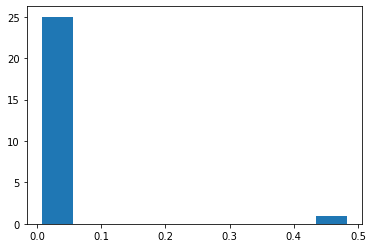

In [17]:
plt.hist(hist)